# Analysis of Housing Price Dataset

In this Portfolio task, I will be working on a dataset named "Housing Price" Dataset, which contains numerous datas about Houses based on their details. My main task is to train classification model to predict **Housing price** ('price' in dataset) and evaluate the strengths and weaknesses of these models.

The explanation of each column will be:

|Column|Description|
|:-----:|:-----|
|id|Unique identifier for each property|
|date|Date of property listing|
|price|Property price in currency|
|bedrooms|Number of bedrooms|
|Bathrooms|Number of bathrooms|
|sqft_living|Living area size in square feet|
|sqft_lot|Total lot size in square feet|
|floors|Number of floors|
|waterfront|Indicates if property has waterfront view( 0 for no, 1 for yes)|
|view|Quality level of property view|
|condition|An index from 1 to 5 on the condition of the house, where 1 indicates worn out property and 5 indicates excellent condition|
|grade|An index from 1 to 13, where 1-3 falls short of building construction and design, 7 is average, and 11-13 have high-quality design and construction|
|sqft_above|The square footage of interior living space that is above ground level|
|sqft_basement|The square footage of the basement|
|yr_built|The year the house was originally built|
|yr_renovated|The year of the house’s last renovation. A value of 0 indicates no renovations|
|zipcode|The zip code area of the house|
|lat|The latitude coordinate of the house|
|long|The longitude coordinate of the house|
|sqft_living15|The average square footage of the 15 nearest neighbors' living space|
|sqft_lot15|The average square footage of the 15 nearest neighbors' lot spaces|

My goal in this notebook is to build and evaluate predictive models for **Housing Price** from other available features. More specifically, the following major steps will be taken:


1. **Explore** the data and **Clean** the data if it is needed.(Removing outliers)

2. **Find the correlation** between 'salary' and other available features.

3. **Split** the dataset (Train & Test).

4. **Train linear regression** model.

5. **Evaluate** the model

6. **Calculate the accuracy**, **Visualize, Compare and Analyze** the Results

7. **Training** in the second way (KNN), **Calculate the accuracy** and **visualize** the results.

8. **Visualize** and **Compare** the models and their results. 

## Task1

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import plot_roc_curve

### Exploring Data

In [144]:
ds = "Housing.csv"
df_p = pd.read_csv(ds)

In [145]:
df_p.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [146]:
df_p.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580306e+09,5.400886e+05,3.370795,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876570e+09,3.671268e+05,0.930105,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Cleaning data

In [147]:
df = df_p.dropna()

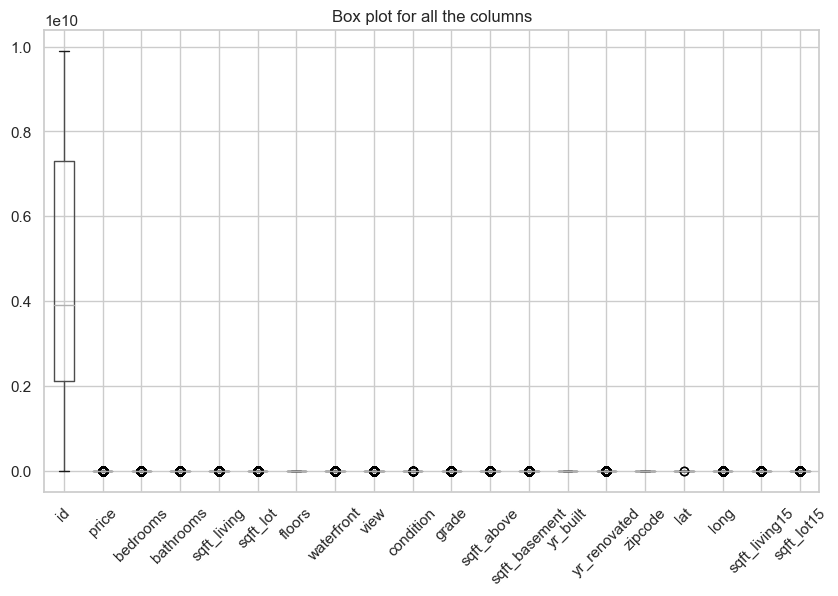

In [148]:
# Finding outliers
plt.figure(figsize=(10, 6))  

df.boxplot(widths=0.5)  

# Adding title and rotating x-axis labels
plt.title("Box plot for all the columns")
plt.xticks(rotation=45)

plt.show()

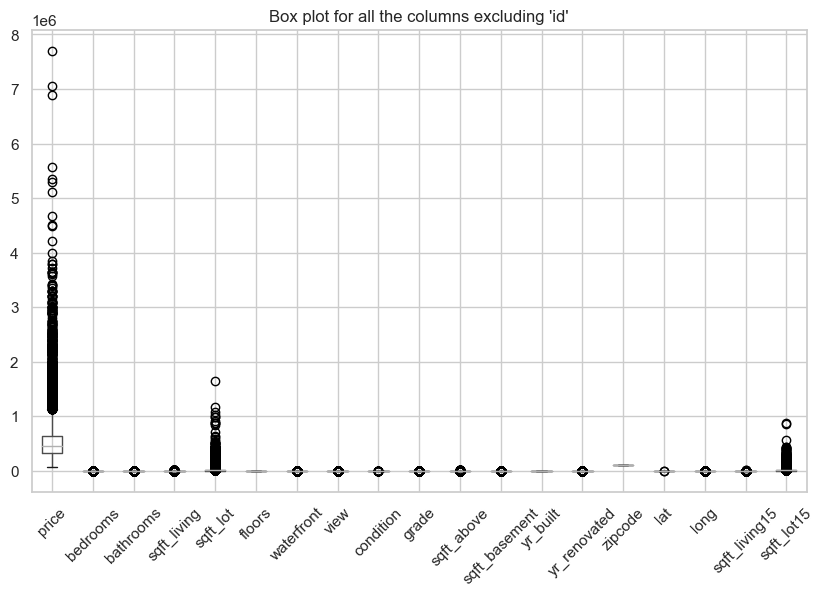

In [149]:
df = df.drop('id', axis=1)
# Finding outliers
plt.figure(figsize=(10, 6))  

df.boxplot(widths=0.5)  

# Adding title and rotating x-axis labels
plt.title("Box plot for all the columns excluding 'id'")
plt.xticks(rotation=45)

plt.show()

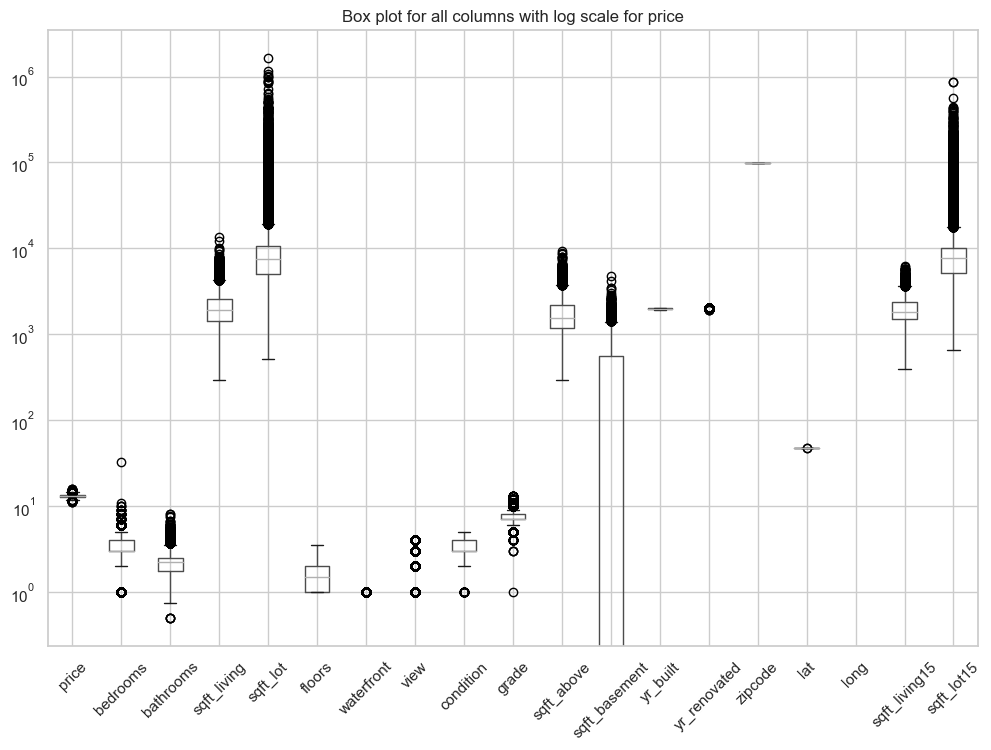

In [150]:
# Because I wanna see outliers more clearly Apply log transformation to the 'price' to reduce skewness
df['price'] = np.log(df['price'])

# Set a larger figure size
plt.figure(figsize=(12, 8))

# Create boxplots
df.boxplot(widths=0.5)

# Adding title and rotating x-axis labels
plt.title("Box plot for all columns with log scale for price")
plt.xticks(rotation=45)
plt.yscale('log')  # Optional: apply log scale to y-axis to enhance visibility further

plt.show()

### Removing outliers

In [151]:
# Suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Now I wanna remove outliers based on IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.25 * IQR
upper_bound = Q3 + 1.1 * IQR

outliers = (df < lower_bound) | (df > upper_bound)

df = df[~outliers.any(axis=1)]

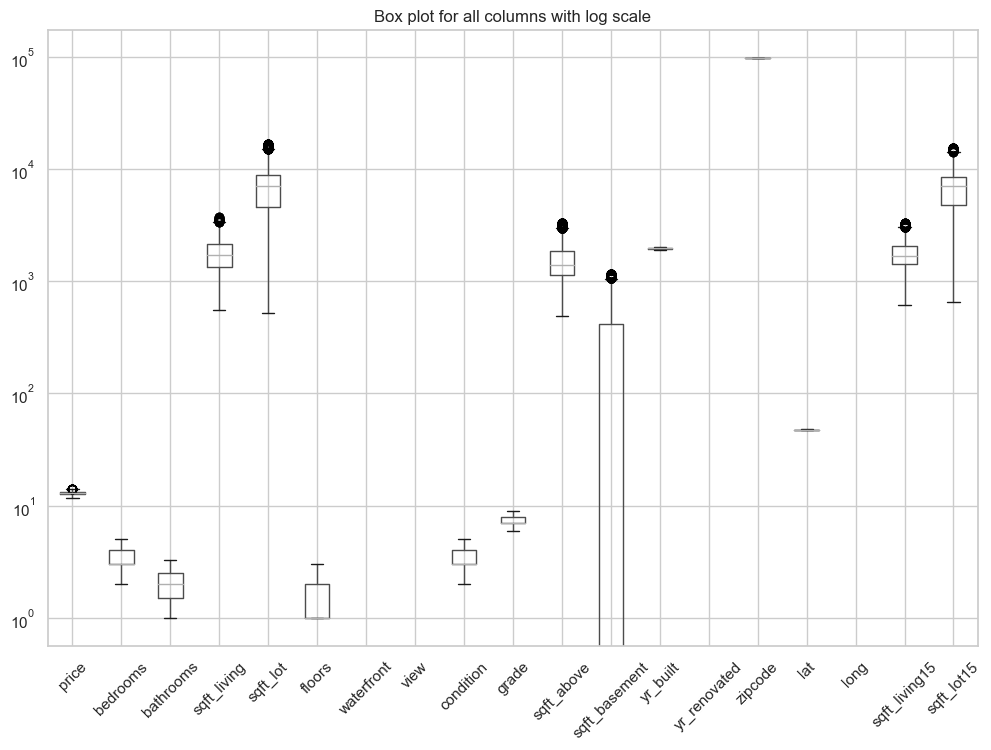

In [152]:
plt.figure(figsize=(12, 8))
df.boxplot(widths=0.5)

plt.title("Box plot for all columns with log scale")
plt.xticks(rotation=45)
plt.yscale('log')  

plt.show()

## Task 2

### Finding Correlation

In [153]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.204485,0.325246,0.482098,-0.108540,0.232896,NaN,NaN,0.088478,0.511681,0.374622,0.186303,-0.042777,NaN,0.006139,0.549021,0.038284,0.424602,-0.119603
bedrooms,0.204485,1.000000,0.426756,0.600542,0.218771,0.123131,NaN,NaN,0.037981,0.270642,0.479487,0.209882,0.137775,NaN,-0.190030,-0.101800,0.194558,0.394645,0.208777
bathrooms,0.325246,0.426756,1.000000,0.663160,-0.077444,0.516859,NaN,NaN,-0.139083,0.575064,0.586612,0.132923,0.587471,NaN,-0.268875,-0.080841,0.303523,0.504087,-0.081491
sqft_living,0.482098,0.600542,0.663160,1.000000,0.173549,0.316837,NaN,NaN,-0.050058,0.613791,0.833043,0.289593,0.323238,NaN,-0.250138,-0.052761,0.300275,0.715532,0.158868
sqft_lot,-0.108540,0.218771,-0.077444,0.173549,1.000000,-0.428348,NaN,NaN,0.151458,-0.033317,0.130870,0.073968,-0.098706,NaN,-0.261113,-0.137876,0.252989,0.215639,0.888761
floors,0.232896,0.123131,0.516859,0.316837,-0.428348,1.000000,NaN,NaN,-0.288167,0.470894,0.510119,-0.334183,0.533355,NaN,-0.062603,0.004165,0.116387,0.238620,-0.431076
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,0.088478,0.037981,-0.139083,-0.050058,0.151458,-0.288167,NaN,NaN,1.000000,-0.177131,-0.169666,0.206907,-0.396639,NaN,0.005222,0.028223,-0.092734,-0.110767,0.150375
grade,0.511681,0.270642,0.575064,0.613791,-0.033317,0.470894,NaN,NaN,-0.177131,1.000000,0.631347,-0.029928,0.488261,NaN,-0.219106,0.045404,0.239502,0.592736,-0.024202


In [154]:
corr_matrix = df.corrwith(df['price']).drop('price')

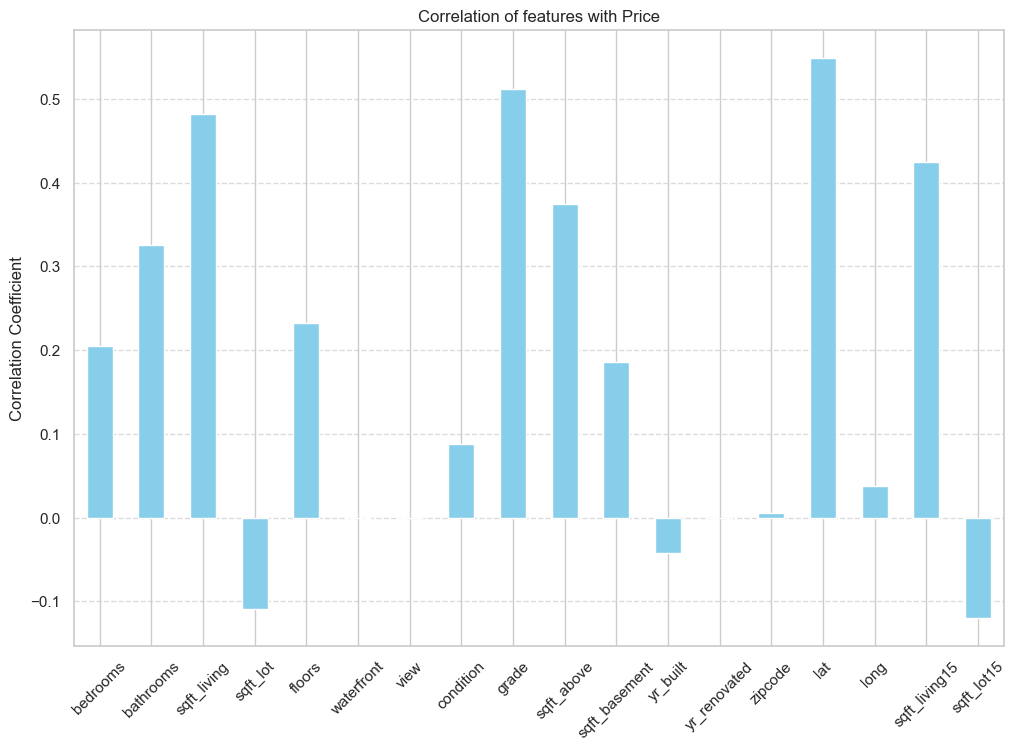

In [155]:
# For better understanding showing correlation with bar chart
plt.figure(figsize=(12, 8))
corr_matrix.plot(kind='bar', color='skyblue')
plt.title('Correlation of features with Price')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [156]:
# The most correlated ones are those with 1/-1 correlation rate.
# So in this dataset, total living square feet of the house and grade(how good the quality of construction and design is for building) are the most helpful factors with predicting the price.

## Task 3

### Spliting

In [157]:
train_case, test_case = train_test_split(df, test_size=0.9, train_size=0.1)

## Task 4

### Training linear regression model

In [158]:
most_correlated= ['sqft_living', 'grade', 'lat','sqft_living15', 'sqft_above', 'bathrooms']

reg = linear_model.LinearRegression()

X_train = train_case[most_correlated]
y_train = train_case['price']

X_test = test_case[most_correlated]
y_test = test_case['price']

reg.fit(X_train, y_train)

LinearRegression()

## Task 5

### Evaluating model

In [159]:
predicted = reg.predict(X_test)
mse = ((np.array(y_test)-predicted)**2).sum()/len(y_test)
r2 = r2_score(y_test, predicted)
mse_sqr = np.sqrt(mse)
print("MSE:", mse)
print("R Squared:", r2)
print("Root MSE: ", mse_sqr)

MSE: 0.06363381018849439
R Squared: 0.6148603412809712
Root MSE:  0.25225742841092785


## Task 6

### Visualize, Compare and Analyze the Results

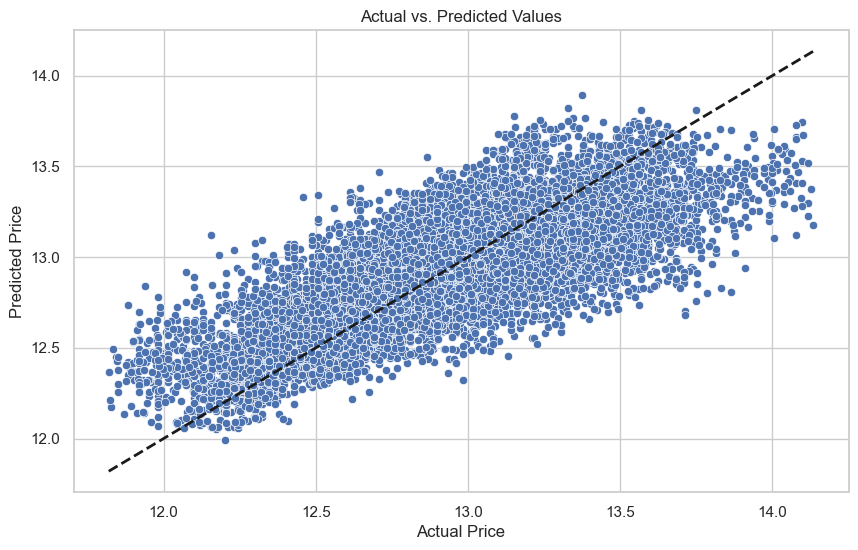

In [169]:
# Now I will analyze the actual and the predicted data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predicted)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Values')
plt.show()

## Task 7

### Training in a second way which is KNN model

In [161]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, y_train)

# Predicting the target values for the test set
prediction_test = knn_regressor.predict(X_test)

# predicting the training set to check training accuracy
prediction_train = knn_regressor.predict(X_train)

In [162]:
# Calculate metrics for the training set
r2_train = r2_score(y_train, prediction_train)
mse_train = mean_squared_error(y_train, prediction_train)
mae_train = mean_absolute_error(y_train, prediction_train)

# Calculate metrics for the test set
r2_test = r2_score(y_test, prediction_test)
mse_test = mean_squared_error(y_test, prediction_test)
mae_test = mean_absolute_error(y_test, prediction_test)

print("Training set for Model -> R-squared:", r2_train)
print("Training set for Model -> MSE:", mse_train)
print("Training set for Model -> MAE:", mae_train)

print("Test set for Model -> R-squared:", r2_test)
print("Test set for Model -> MSE:", mse_test)
print("Test set for Model -> MAE:", mae_test)

Training set for Model -> R-squared: 0.5311268654693223
Training set for Model -> MSE: 0.07613070276765878
Training set for Model -> MAE: 0.2234613394298539
Test set for Model -> R-squared: 0.05844256856502217
Test set for Model -> MSE: 0.15556665099817582
Test set for Model -> MAE: 0.32023847883684975


In [163]:
# R-squared closer to 1.0, and lower values of MSE and MAE indicate a better model

### Tune the hyper-parameter K

In [164]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': list(range(1, 100))}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_hp = grid_search.best_params_['n_neighbors']
print(f'Best Hyperparameters: {best_hp}')

Best Hyperparameters: 68


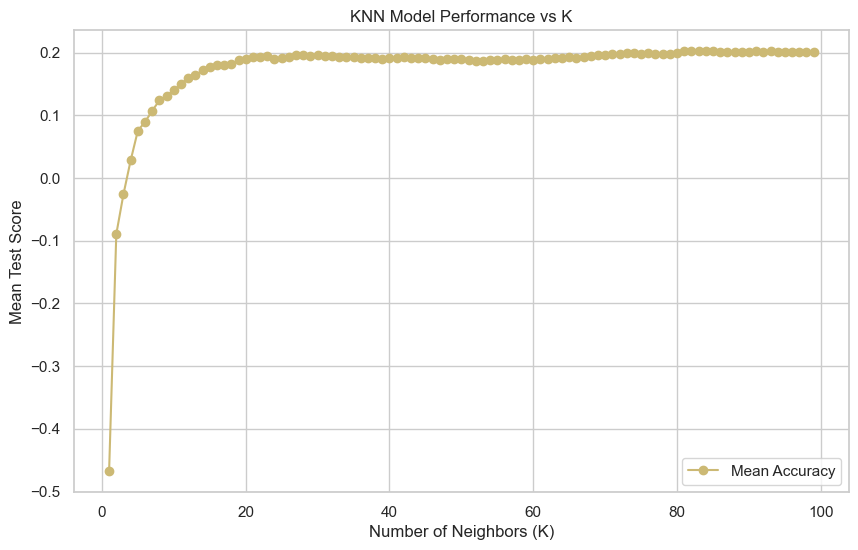

In [165]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor


param_grid = {'n_neighbors': list(range(1, 100))}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
grid_search.fit(X_train_a, y_train_a)

# Extracting test scores
test_scores = grid_search.cv_results_['mean_test_score']
k_values = param_grid['n_neighbors'] 

# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(k_values, test_scores, marker='o', linestyle='-', color='y', label='Mean Accuracy')
plt.title('KNN Model Performance vs K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Test Score')
plt.legend()
plt.show()

In [166]:
# It is crucial to pick the right K. 
# If you choose the small K (Small values), it will result in overlifting (performs poorly on unseen data)
# If you choose the large K (High values), it will result in underlfting (considers too many irrelevant neighbors)
# If you choose moderate K, it will Aim to maximize prediction accuracy by minimizing both overfitting and underfitting.

## Task 8

### Compairing our models and results

In [167]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


metrics = {
    'Model': ['KNN', 'Linear Regression'],
    'R-squared': [r2_test, r2],
    'MSE': [mse_test, mse],

}

import pandas as pd
results_df = pd.DataFrame(metrics)

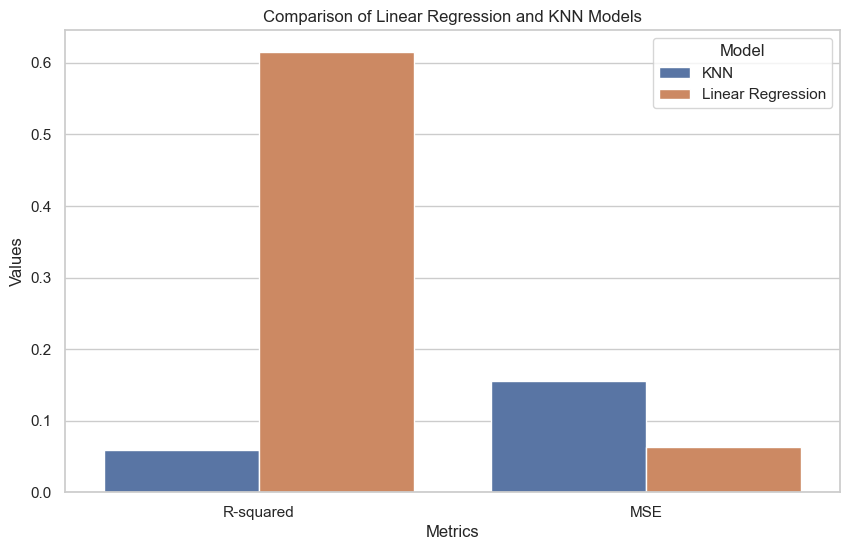

In [168]:
# Setting the style
sns.set(style="whitegrid")

# Melting the DataFrame to make it suitable for sns.barplot
results_melted = results_df.melt('Model', var_name='Metrics', value_name='Values')

# Creating a bar plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Metrics', y='Values', hue='Model', data=results_melted)
plt.title('Comparison of Linear Regression and KNN Models')
plt.show()